In [21]:
from tensorflow import keras
from keras.datasets import cifar10
# Load the CIFAR -10 dataset
(train_images,train_labels),(test_images,test_labels)  = cifar10.load_data ()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [22]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import layers

In [23]:
import tensorflow as tf

# Check for GPU availability
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [24]:
# Explicitly set TensorFlow to use GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


CIFAR-10 Dataset
Number of training images: 50000
Number of testing images: 10000
Number of classes: 10
Class names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


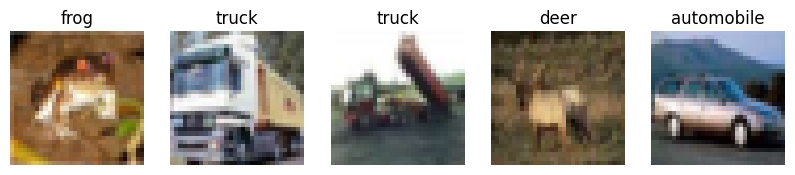

In [25]:
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Visualize the headers
print("CIFAR-10 Dataset")
print("Number of training images:", len(train_images))
print("Number of testing images:", len(test_images))
print("Number of classes:", len(class_names))
print("Class names:", class_names)

# Visualize some sample elements
n_samples = 5
print(train_labels)
print(test_labels)

plt.figure(figsize=(10, 3))
for i in range(n_samples):
    plt.subplot(1, n_samples, i + 1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')

plt.show()



In [26]:
# Split the dataset into training and temporary data
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=10000, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(test_images.shape)
print(test_labels.shape)

(40000, 32, 32, 3)
(40000, 1)
(10000, 32, 32, 3)
(10000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [27]:
# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_val = X_val.astype("float32") / 255
test_images = test_images.astype("float32") / 255

In [28]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.regularizers import l2


model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu',padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu',padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu',padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(10, activation='softmax')


])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_24 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_25 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                      

Epoch 1/20
1250/1250 [==============================] - 57s 12ms/step - loss: 2.4669 - accuracy: 0.4500 - val_loss: 1.3112 - val_accuracy: 0.5779
Epoch 2/20
1250/1250 [==============================] - 15s 12ms/step - loss: 1.1940 - accuracy: 0.6353 - val_loss: 1.0030 - val_accuracy: 0.6913
Epoch 3/20
1250/1250 [==============================] - 15s 12ms/step - loss: 1.0118 - accuracy: 0.7003 - val_loss: 1.0685 - val_accuracy: 0.6877
Epoch 4/20
1250/1250 [==============================] - 14s 11ms/step - loss: 0.9060 - accuracy: 0.7399 - val_loss: 0.8691 - val_accuracy: 0.7527
Epoch 5/20
1250/1250 [==============================] - 14s 11ms/step - loss: 0.8227 - accuracy: 0.7683 - val_loss: 0.9113 - val_accuracy: 0.7351
Epoch 6/20
1250/1250 [==============================] - 14s 11ms/step - loss: 0.7549 - accuracy: 0.7960 - val_loss: 0.7977 - val_accuracy: 0.7671
Epoch 7/20
1250/1250 [==============================] - 14s 11ms/step - loss: 0.7035 - accuracy: 0.8110 - val_loss: 0.8687 -

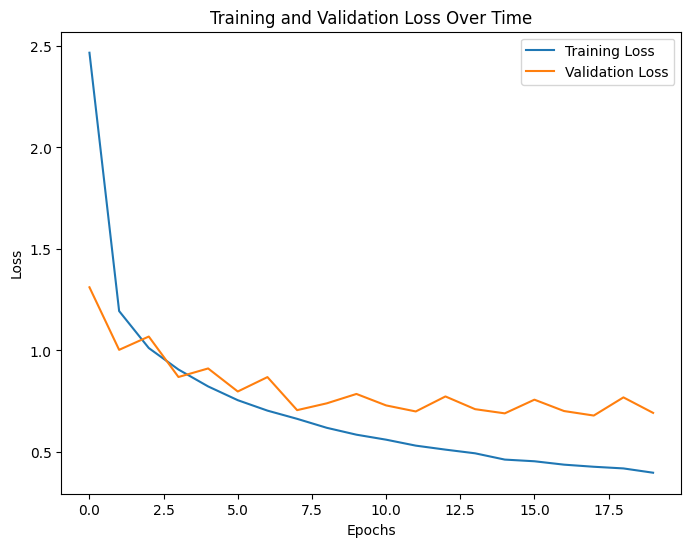

In [29]:
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
num_epochs = 20
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val))

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Time')
plt.show()


In [30]:
print("Evaluate on test data")
results = model.evaluate(test_images, test_labels) #test_images, test_labels | X_val, y_val
print("test loss, test acc:", results)

Evaluate on test data
313/313 [==============================] - 1s 5ms/step - loss: 0.7351 - accuracy: 0.8341
test loss, test acc: [0.7351070046424866, 0.8341000080108643]


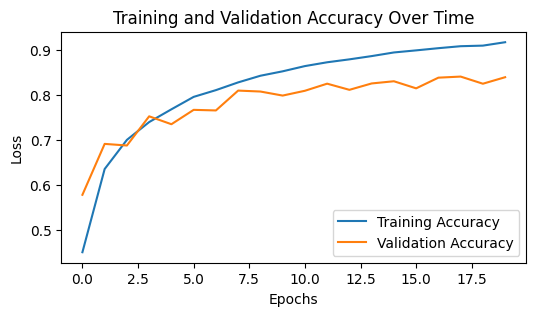

In [31]:
plt.figure(figsize=(6, 3))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Accuracy Over Time')
plt.show()

313/313 [==============================] - 1s 3ms/step


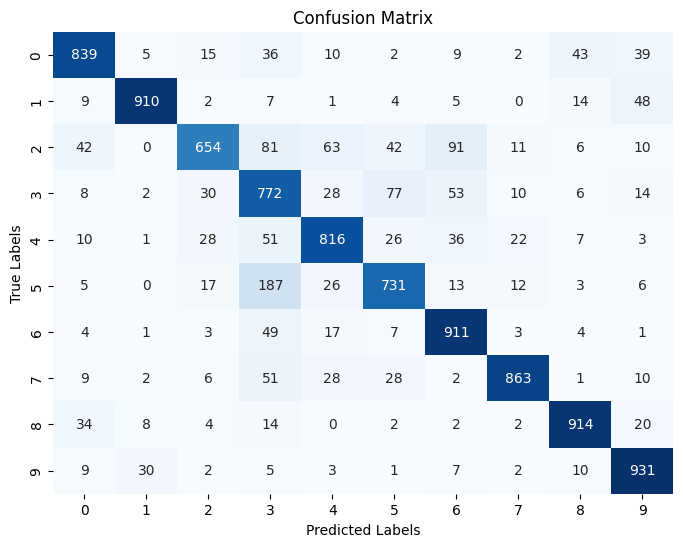

Precision: 0.8412467396154687
Recall: 0.8341
Accuracy: 0.8341


In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns

# Convert true labels to 1D array
test_labels_flat = test_labels.flatten()

predictions = model.predict(test_images)
predicted_labels = tf.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(test_labels_flat, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Overall precision, recall, and accuracy
precision = precision_score(test_labels_flat, predicted_labels, average='weighted')
recall = recall_score(test_labels_flat, predicted_labels, average='weighted')
accuracy = accuracy_score(test_labels_flat, predicted_labels)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
